In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end_kernel

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('concrete')

In [3]:
y_mean = torch.mean(y_train)
y_sd = torch.std(y_train)

y_train = (y_train - y_mean) / y_sd

In [4]:
end2end_model = end2end_kernel.train_model_kernel(x_train, y_train, n_epoch = 500, hidden_layers = [50, 50], learning_rate = 0.0012)

initial loss:  2.7081260681152344
cal loss:  0.3208566904067993 cal error: 0.02854222222222222 nllk loss:  tensor(1.1614, grad_fn=<MeanBackward0>) kernel loss: tensor(0.5156, grad_fn=<MeanBackward0>)
cal loss:  0.8127381205558777 cal error: 0.028695111111111095 nllk loss:  tensor(1.0606, grad_fn=<MeanBackward0>) kernel loss: tensor(0.4054, grad_fn=<MeanBackward0>)
cal loss:  0.16924330592155457 cal error: 0.01243199999999999 nllk loss:  tensor(0.9746, grad_fn=<MeanBackward0>) kernel loss: tensor(0.3112, grad_fn=<MeanBackward0>)
cal loss:  0.8822608590126038 cal error: 0.014508444444444438 nllk loss:  tensor(0.8816, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2184, grad_fn=<MeanBackward0>)
cal loss:  0.9040035605430603 cal error: 0.007903999999999991 nllk loss:  tensor(0.8161, grad_fn=<MeanBackward0>) kernel loss: tensor(0.2325, grad_fn=<MeanBackward0>)
cal loss:  0.4144909083843231 cal error: 0.007756444444444429 nllk loss:  tensor(0.7501, grad_fn=<MeanBackward0>) kernel loss: tenso

cal loss:  0.47464221715927124 cal error: 0.06297599999999999 nllk loss:  tensor(-0.2988, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0788, grad_fn=<MeanBackward0>)
cal loss:  0.2673870027065277 cal error: 0.18916977777777788 nllk loss:  tensor(-0.3118, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0743, grad_fn=<MeanBackward0>)
cal loss:  0.20019222795963287 cal error: 0.08074133333333328 nllk loss:  tensor(-0.3004, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0747, grad_fn=<MeanBackward0>)
cal loss:  0.36608415842056274 cal error: 0.12673422222222222 nllk loss:  tensor(-0.3835, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0775, grad_fn=<MeanBackward0>)
cal loss:  0.4591537415981293 cal error: 0.028147555555555533 nllk loss:  tensor(-0.4113, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0688, grad_fn=<MeanBackward0>)
cal loss:  0.18790483474731445 cal error: 0.09394133333333336 nllk loss:  tensor(-0.4492, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0668, grad_fn=<MeanBackw

cal loss:  0.25410985946655273 cal error: 0.1265866666666667 nllk loss:  tensor(-0.7646, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0611, grad_fn=<MeanBackward0>)
cal loss:  0.2196199893951416 cal error: 0.06288711111111106 nllk loss:  tensor(-0.7531, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0593, grad_fn=<MeanBackward0>)
cal loss:  0.2118028700351715 cal error: 0.13031288888888892 nllk loss:  tensor(-0.7735, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0683, grad_fn=<MeanBackward0>)
cal loss:  0.11689116805791855 cal error: 0.06371022222222218 nllk loss:  tensor(-0.7696, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0588, grad_fn=<MeanBackward0>)
cal loss:  0.4137127697467804 cal error: 0.11710577777777781 nllk loss:  tensor(-0.7933, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0672, grad_fn=<MeanBackward0>)
cal loss:  0.2758674621582031 cal error: 0.06449599999999997 nllk loss:  tensor(-0.7805, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0565, grad_fn=<MeanBackward0

cal loss:  0.14354781806468964 cal error: 0.11016533333333338 nllk loss:  tensor(-0.9908, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0492, grad_fn=<MeanBackward0>)
cal loss:  0.114038847386837 cal error: 0.07587733333333327 nllk loss:  tensor(-0.9825, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0585, grad_fn=<MeanBackward0>)
cal loss:  0.14030537009239197 cal error: 0.11253866666666672 nllk loss:  tensor(-0.9940, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0601, grad_fn=<MeanBackward0>)
cal loss:  0.2484251707792282 cal error: 0.08309155555555553 nllk loss:  tensor(-0.9787, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0550, grad_fn=<MeanBackward0>)
cal loss:  0.35591182112693787 cal error: 0.11828088888888894 nllk loss:  tensor(-0.9965, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0661, grad_fn=<MeanBackward0>)
cal loss:  0.2170334905385971 cal error: 0.08299199999999995 nllk loss:  tensor(-0.9840, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0508, grad_fn=<MeanBackward

cal loss:  0.19722940027713776 cal error: 0.08954133333333329 nllk loss:  tensor(-1.1286, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0490, grad_fn=<MeanBackward0>)
cal loss:  0.136801615357399 cal error: 0.10395022222222228 nllk loss:  tensor(-1.1475, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0490, grad_fn=<MeanBackward0>)
cal loss:  0.11711886525154114 cal error: 0.08899555555555552 nllk loss:  tensor(-1.1357, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0509, grad_fn=<MeanBackward0>)
cal loss:  0.14068131148815155 cal error: 0.1183644444444445 nllk loss:  tensor(-1.1388, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0514, grad_fn=<MeanBackward0>)
cal loss:  0.19380377233028412 cal error: 0.09164444444444443 nllk loss:  tensor(-1.1346, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0450, grad_fn=<MeanBackward0>)
cal loss:  0.13048209249973297 cal error: 0.11305777777777781 nllk loss:  tensor(-1.1496, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0502, grad_fn=<MeanBackwar

cal loss:  0.09299889951944351 cal error: 0.11347733333333339 nllk loss:  tensor(-1.2523, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0431, grad_fn=<MeanBackward0>)
cal loss:  0.10585323721170425 cal error: 0.10528888888888883 nllk loss:  tensor(-1.2452, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0502, grad_fn=<MeanBackward0>)
cal loss:  0.13197600841522217 cal error: 0.1143555555555556 nllk loss:  tensor(-1.2546, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0564, grad_fn=<MeanBackward0>)
cal loss:  0.19441500306129456 cal error: 0.09612088888888884 nllk loss:  tensor(-1.2600, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0515, grad_fn=<MeanBackward0>)
cal loss:  0.39154189825057983 cal error: 0.10866311111111115 nllk loss:  tensor(-1.2672, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0421, grad_fn=<MeanBackward0>)
cal loss:  0.07460466027259827 cal error: 0.09772088888888883 nllk loss:  tensor(-1.2635, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0425, grad_fn=<MeanBackw

cal loss:  0.11377143859863281 cal error: 0.10896533333333329 nllk loss:  tensor(-1.3515, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0462, grad_fn=<MeanBackward0>)
cal loss:  0.09428106993436813 cal error: 0.11828444444444448 nllk loss:  tensor(-1.3550, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0561, grad_fn=<MeanBackward0>)
cal loss:  0.17950093746185303 cal error: 0.10802488888888885 nllk loss:  tensor(-1.3587, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0435, grad_fn=<MeanBackward0>)
cal loss:  0.16679805517196655 cal error: 0.12685688888888894 nllk loss:  tensor(-1.3474, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0487, grad_fn=<MeanBackward0>)
cal loss:  0.22588898241519928 cal error: 0.11461688888888888 nllk loss:  tensor(-1.3519, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0526, grad_fn=<MeanBackward0>)
cal loss:  0.20200946927070618 cal error: 0.12594666666666673 nllk loss:  tensor(-1.3550, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0466, grad_fn=<MeanBack

cal loss:  0.1230461448431015 cal error: 0.13905777777777784 nllk loss:  tensor(-1.4365, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0477, grad_fn=<MeanBackward0>)
cal loss:  0.10412964969873428 cal error: 0.11779199999999997 nllk loss:  tensor(-1.4435, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0525, grad_fn=<MeanBackward0>)
cal loss:  0.16088761389255524 cal error: 0.13584000000000002 nllk loss:  tensor(-1.4401, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0471, grad_fn=<MeanBackward0>)
cal loss:  0.05171160399913788 cal error: 0.11728888888888885 nllk loss:  tensor(-1.4442, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0508, grad_fn=<MeanBackward0>)
cal loss:  0.14915768802165985 cal error: 0.14694577777777784 nllk loss:  tensor(-1.4307, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0457, grad_fn=<MeanBackward0>)
cal loss:  0.06622125208377838 cal error: 0.12218488888888886 nllk loss:  tensor(-1.4386, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0472, grad_fn=<MeanBackw

cal loss:  0.18452556431293488 cal error: 0.11513777777777773 nllk loss:  tensor(-1.5238, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0435, grad_fn=<MeanBackward0>)
cal loss:  0.057163286954164505 cal error: 0.1470346666666667 nllk loss:  tensor(-1.5165, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0539, grad_fn=<MeanBackward0>)
cal loss:  0.16052506864070892 cal error: 0.11908977777777774 nllk loss:  tensor(-1.5225, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0360, grad_fn=<MeanBackward0>)
cal loss:  0.1148206889629364 cal error: 0.15557155555555563 nllk loss:  tensor(-1.5055, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0440, grad_fn=<MeanBackward0>)
cal loss:  0.1288146674633026 cal error: 0.11404266666666663 nllk loss:  tensor(-1.5342, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0513, grad_fn=<MeanBackward0>)
cal loss:  0.16173312067985535 cal error: 0.14403022222222223 nllk loss:  tensor(-1.5245, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0488, grad_fn=<MeanBackwa

cal loss:  0.22337713837623596 cal error: 0.15967111111111115 nllk loss:  tensor(-1.5825, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0471, grad_fn=<MeanBackward0>)
cal loss:  0.058723531663417816 cal error: 0.12942933333333329 nllk loss:  tensor(-1.5911, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0365, grad_fn=<MeanBackward0>)
cal loss:  0.08006605505943298 cal error: 0.16763200000000003 nllk loss:  tensor(-1.5717, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0411, grad_fn=<MeanBackward0>)
cal loss:  0.15051405131816864 cal error: 0.12559111111111107 nllk loss:  tensor(-1.6020, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0443, grad_fn=<MeanBackward0>)
cal loss:  0.13898567855358124 cal error: 0.1645955555555556 nllk loss:  tensor(-1.5805, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0392, grad_fn=<MeanBackward0>)
cal loss:  0.057983048260211945 cal error: 0.12572977777777777 nllk loss:  tensor(-1.6041, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0437, grad_fn=<MeanBac

cal loss:  0.10340870171785355 cal error: 0.13903111111111102 nllk loss:  tensor(-1.6531, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0446, grad_fn=<MeanBackward0>)
cal loss:  0.15086275339126587 cal error: 0.17959466666666674 nllk loss:  tensor(-1.6329, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0481, grad_fn=<MeanBackward0>)
cal loss:  0.07650891691446304 cal error: 0.13882666666666663 nllk loss:  tensor(-1.6561, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0374, grad_fn=<MeanBackward0>)
cal loss:  0.19159150123596191 cal error: 0.1710933333333334 nllk loss:  tensor(-1.6468, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0421, grad_fn=<MeanBackward0>)
cal loss:  0.226157546043396 cal error: 0.1357528888888888 nllk loss:  tensor(-1.6601, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0400, grad_fn=<MeanBackward0>)
cal loss:  0.09447156637907028 cal error: 0.17429511111111118 nllk loss:  tensor(-1.6452, grad_fn=<MeanBackward0>) kernel loss: tensor(0.0442, grad_fn=<MeanBackward

End2end test MAPE:  0.16432084
End2end test RMSE:  6.264535
End2end test NLLK:  4.624625
End2end test CRPS:  tensor(3.3643)


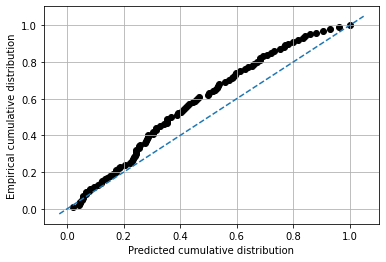

End2end test calibration error when step size is 0.001:  10.003896938775513
End2end test calibration error when step size is 0.01:  1.0011811224489802
End2end test calibration error when step size is 0.1:  0.10141581632653068


In [5]:
mean_pred, var_pred, _ = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy() * y_sd.detach().numpy()+ y_mean.detach().numpy()
var_pred = var_pred.detach().numpy() * torch.pow(y_sd, 2).detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [6]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 12.15it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 12.08it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.33it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           4.675
  RMSE          6.265
  MDAE          3.611
  MARPD         15.304
  R2            0.860
  Correlation   0.930
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.075
  Mean-absolute Calibration Error       0.066
  Miscalibration Area                   0.067
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.152
     Group Size: 0.56 -- Calibration Error: 0.094
     Group Size: 1.00 -- Calibration Error: 0.066
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.166
     Group Size: 0.56 -- Calibration Error: 0.103
     Group Size: 1.00 -- Calibration Error: 0.075
===============

Lims is None. Setting lims now:
min_max_true: (2.33, 80.2)
min_max_pred: (4.52133, 76.7983)
lims: (2.33, 80.2)
lims_ext: (-5.456999588012696, 87.98699645996093)


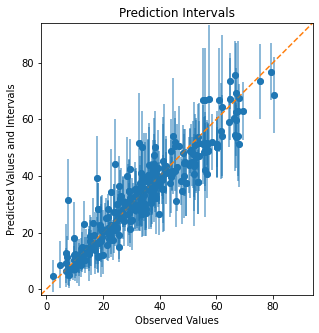

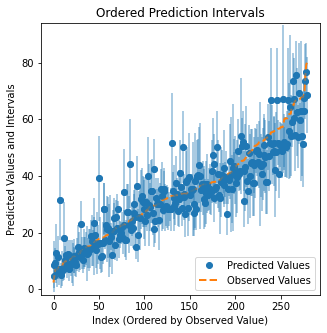

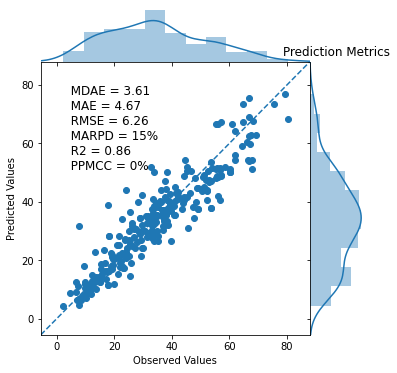

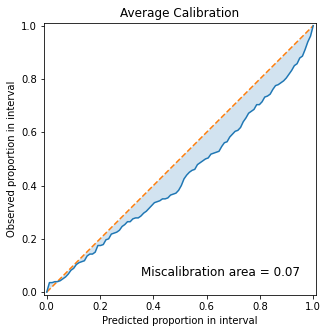

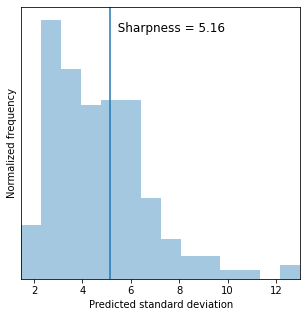

In [7]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))